# PandasRollingAndExpanding - Moving Average and Bollinger Bands

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
# set date as index column and parse dates while reading csv
df = pd.read_csv("/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Finance_Files/05-Pandas-with-Time-Series/time_data/walmart_stock.csv", parse_dates=['Date'], index_col='Date')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


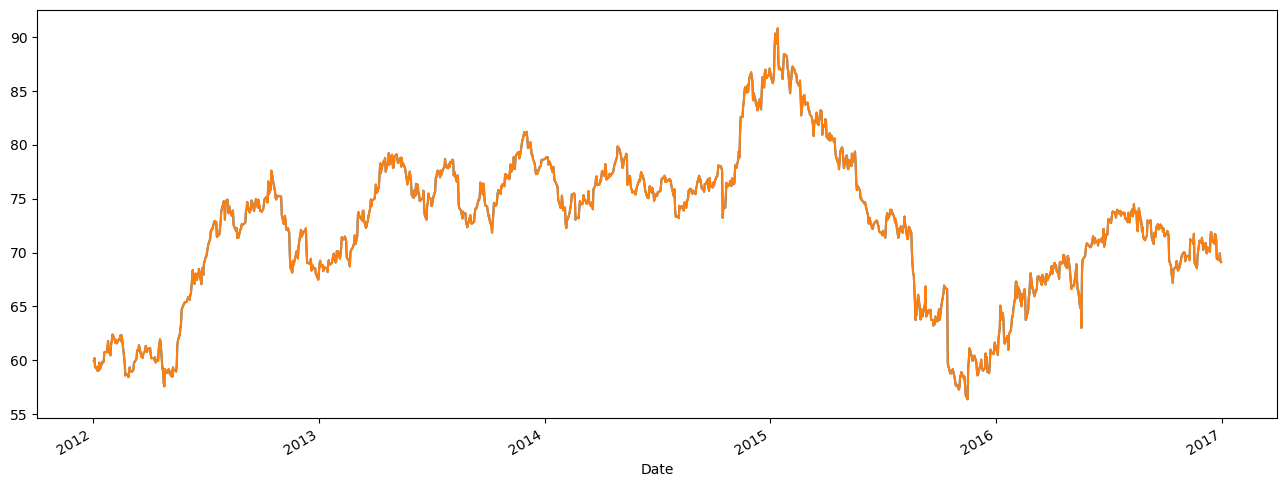

In [7]:
df['Open'].plot(figsize=(16,6))
plt.show()

In [8]:
# 7 day moving average
df.rolling(window=7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


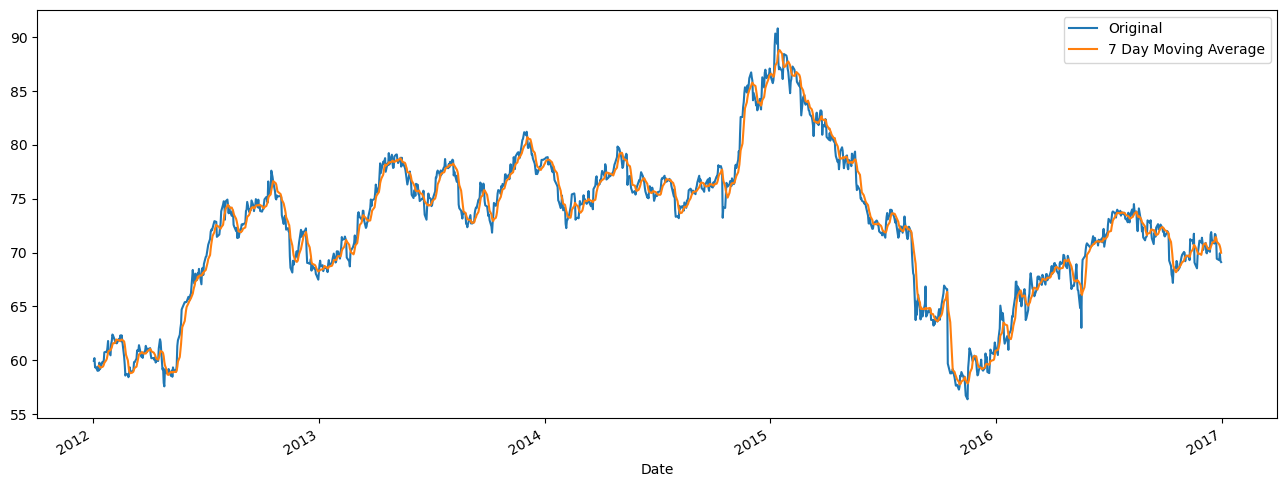

In [9]:
# plot 7 day moving average of 'Open' price and compare with original 'Open' price
df['Open'].plot(label='Original', figsize=(16,6))
df['Open'].rolling(window=7).mean().plot(label='7 Day Moving Average')
plt.legend()
plt.show()

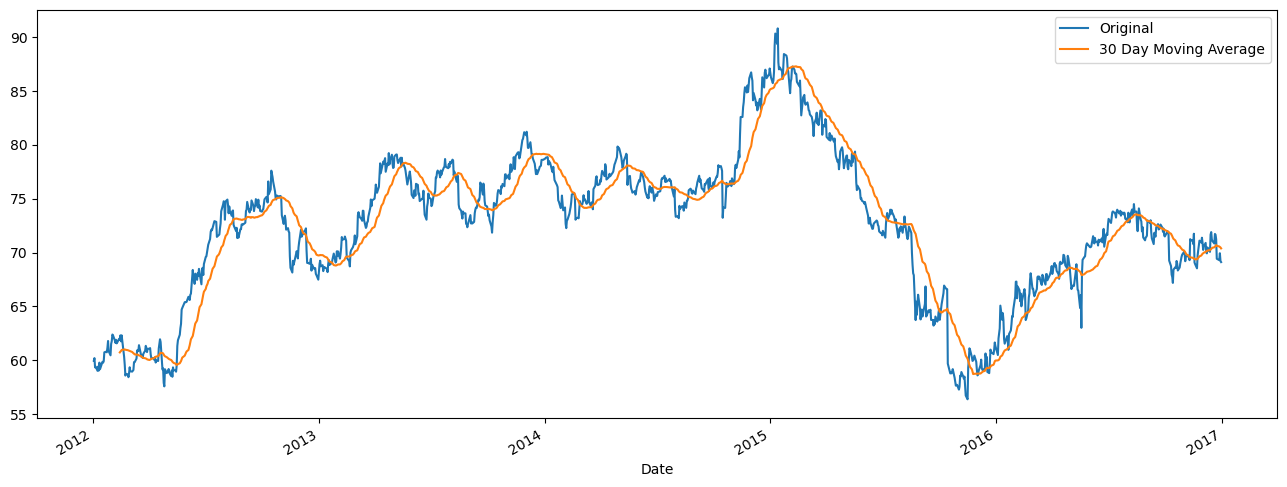

In [10]:
# plot 30 day moving average of 'Open' price and compare with original 'Open' price
df['Open'].plot(label='Original', figsize=(16,6))
df['Open'].rolling(window=30).mean().plot(label='30 Day Moving Average')
plt.legend()
plt.show()

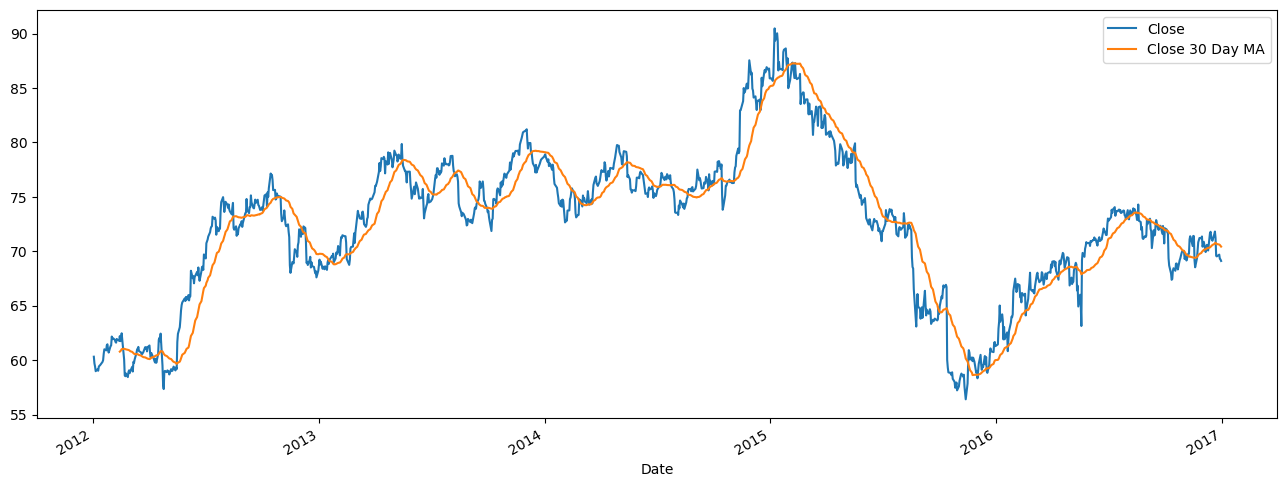

In [11]:
# another way to add the legend
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Close 30 Day MA']].plot(figsize=(16,6))
plt.show()

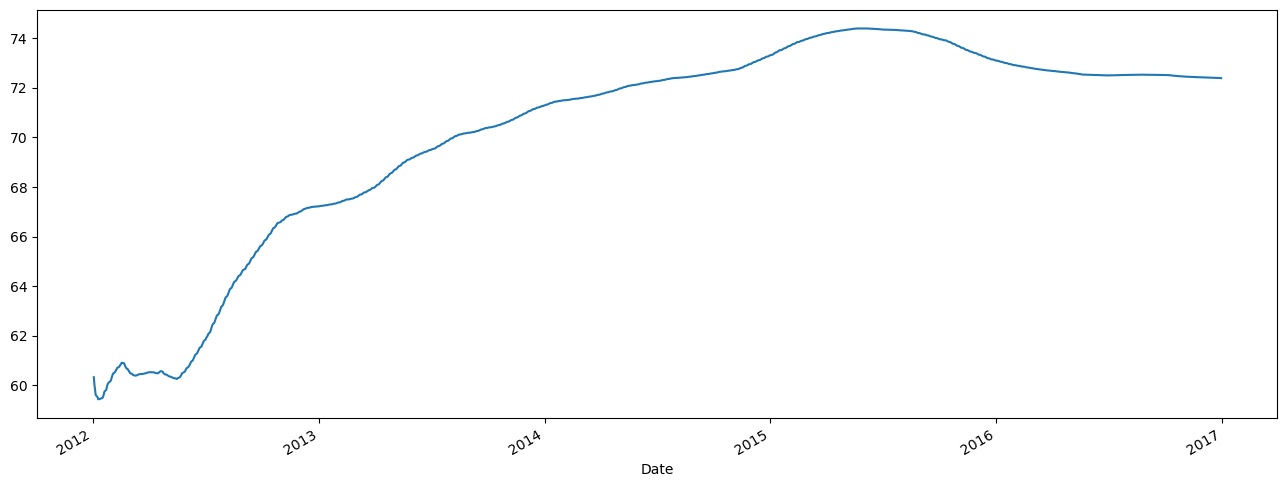

In [ ]:
# expanding average - cumulative moving average of all the previous data points
# show if the average price is increasing or decreasing over time
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))
plt.show()

## Bollenger Bands
Volitility bands placed above or below a moving average - volitility is based on the standard deviation
Bands widen when volitility increases or shrink when it decreases

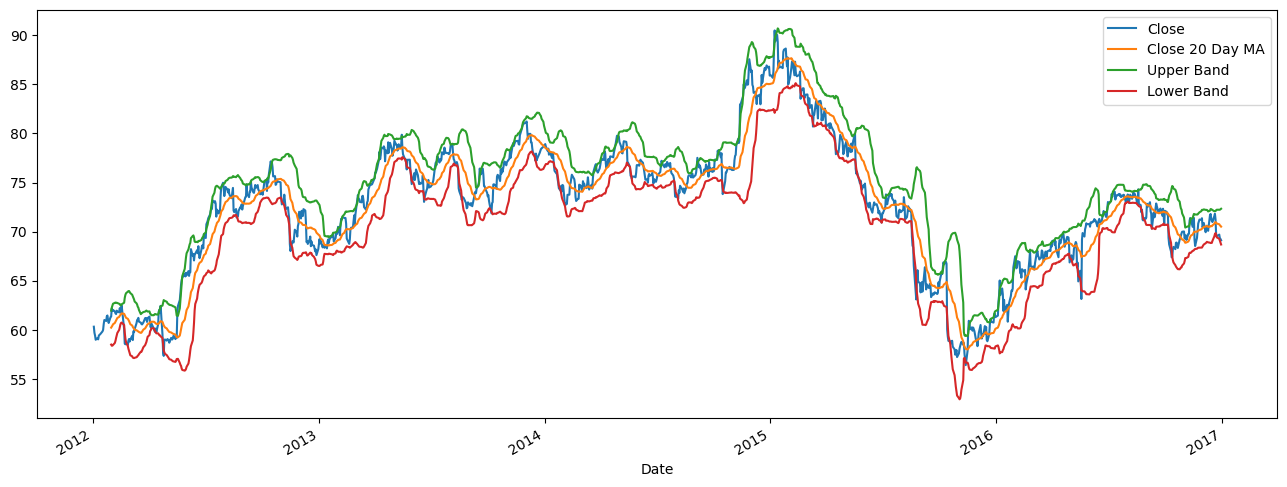

In [13]:
# Close 20 day moving average
df['Close 20 Day MA'] = df['Close'].rolling(window=20).mean()

# Close 20 day moving std deviation
df['Close 20 Day STD'] = df['Close'].rolling(window=20).std()

# Upper Bollinger Band = 20 day moving average + (2 x 20 day std deviation)
df['Upper Band'] = df['Close 20 Day MA'] + (df['Close 20 Day STD'] * 2)
# Lower Bollinger Band = 20 day moving average - (2 x 20 day std deviation)
df['Lower Band'] = df['Close 20 Day MA'] - (df['Close 20 Day STD'] * 2)

#Close price with Bollinger Bands
df[['Close', 'Close 20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(16,6))
plt.show()


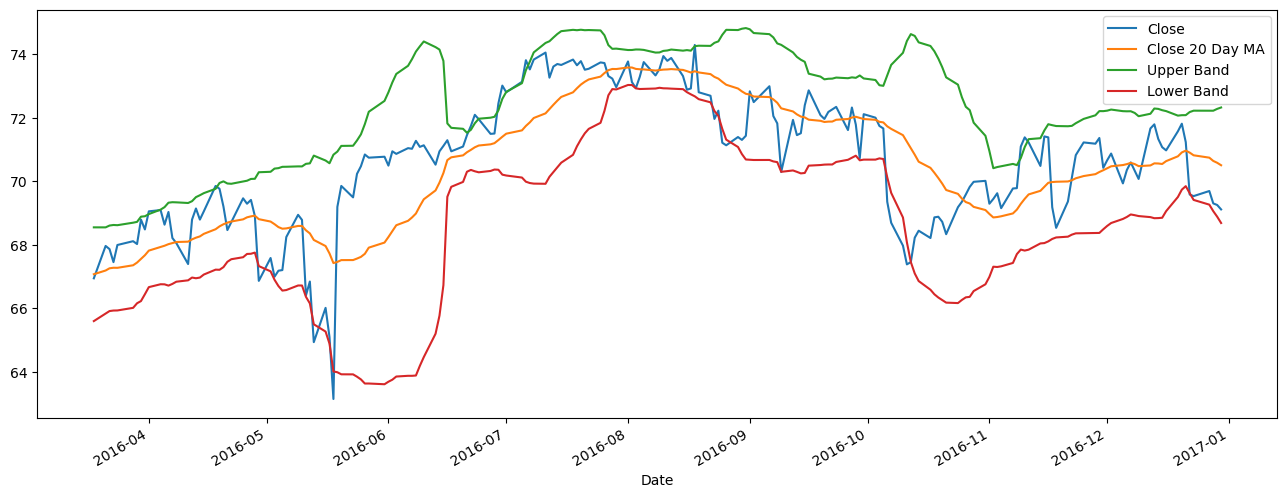

In [14]:
# Plot last 200 days
df[['Close', 'Close 20 Day MA', 'Upper Band', 'Lower Band']].tail(200).plot(figsize=(16,6))
plt.show()